In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as snf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
startup_1=pd.read_csv('50_Startups.csv')

In [3]:
startup_1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startup_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

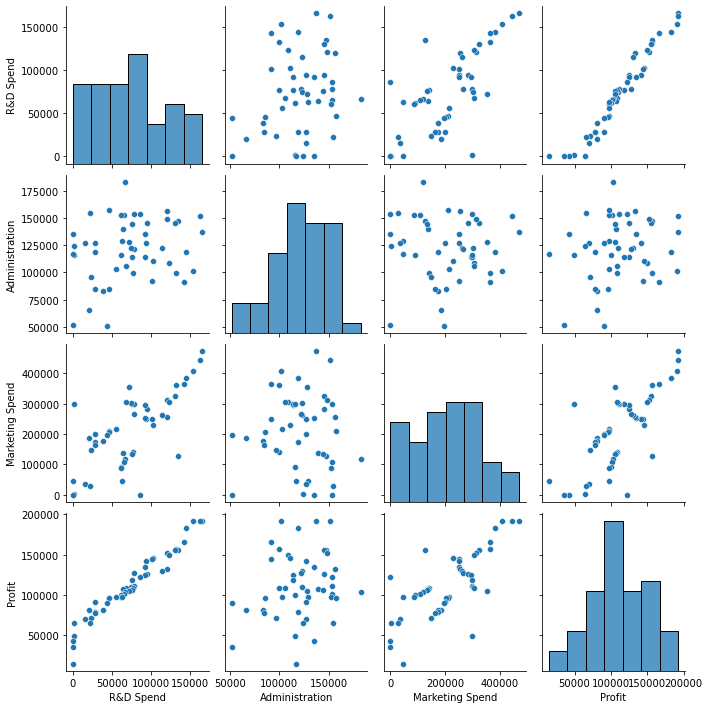

In [6]:
sns.pairplot(startup_1)

In [7]:
comatrix=startup_1.corr()

In [8]:
comatrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

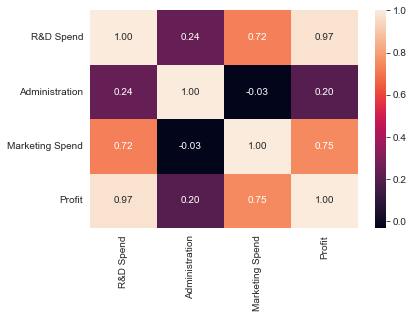

In [218]:
sns.heatmap(comatrix,annot=True,fmt='.2f')

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [11]:
startup_1['State']=labelencoder.fit_transform(startup_1['State'])

In [12]:
startup_1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [18]:
startup_1['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [23]:
startup_1['State'].unique()

array([2, 0, 1])

In [19]:
startup_1.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [24]:
startup_1[['Marketing Spend','R&D Spend']].mean()

Marketing Spend    211025.0978
R&D Spend           73721.6156
dtype: float64

In [35]:
startup_2=startup_1.copy()

In [36]:
startup_2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [37]:
startup_2['R&D Spend'].replace(to_replace=0.00,value=startup_2['R&D Spend'].mean(),inplace=True)

In [38]:
startup_2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2000,136897.80,471784.10,2,192261.83
1,162597.7000,151377.59,443898.53,0,191792.06
2,153441.5100,101145.55,407934.54,1,191050.39
3,144372.4100,118671.85,383199.62,2,182901.99
4,142107.3400,91391.77,366168.42,1,166187.94
5,131876.9000,99814.71,362861.36,2,156991.12
6,134615.4600,147198.87,127716.82,0,156122.51
7,130298.1300,145530.06,323876.68,1,155752.60
8,120542.5200,148718.95,311613.29,2,152211.77
9,123334.8800,108679.17,304981.62,0,149759.96


In [39]:
startup_2['Marketing Spend'].replace(to_replace=0.00,value=startup_2['Marketing Spend'].mean(),inplace=True)

In [40]:
startup_2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2000,136897.80,471784.1000,2,192261.83
1,162597.7000,151377.59,443898.5300,0,191792.06
2,153441.5100,101145.55,407934.5400,1,191050.39
3,144372.4100,118671.85,383199.6200,2,182901.99
4,142107.3400,91391.77,366168.4200,1,166187.94
5,131876.9000,99814.71,362861.3600,2,156991.12
6,134615.4600,147198.87,127716.8200,0,156122.51
7,130298.1300,145530.06,323876.6800,1,155752.60
8,120542.5200,148718.95,311613.2900,2,152211.77
9,123334.8800,108679.17,304981.6200,0,149759.96


In [55]:
startup_2[['State','Profit']].groupby(['State','Profit']).size().reset_index()

,State,Profit,0
0,0,14681.40,1
1,0,42559.73,1
2,0,65200.33,1
3,0,71498.49,1
4,0,78239.91,1
5,0,81005.76,1
6,0,89949.14,1
7,0,96712.80,1
8,0,97427.84,1
9,0,107404.34,1


In [56]:
scaler=StandardScaler()
startup_2=scaler.fit_transform(startup_2)

In [57]:
startup_2

array([[ 2.06801568,  0.56075291,  2.28164088,  1.21267813,  2.01120333],
       [ 2.00384983,  1.08280658,  2.02518985, -1.21267813,  1.99942997],
       [ 1.7903246 , -0.72825703,  1.69444524,  0.        ,  1.98084225],
       [ 1.57883033, -0.09636463,  1.46696933,  1.21267813,  1.77662724],
       [ 1.52600818, -1.07991935,  1.31034106,  0.        ,  1.35774012],
       [ 1.2874311 , -0.77623907,  1.27992752,  1.21267813,  1.12724963],
       [ 1.35129518,  0.93214721, -0.88259085, -1.21267813,  1.10548055],
       [ 1.25061369,  0.87198001,  0.92140298,  0.        ,  1.09620987],
       [ 1.02310979,  0.9869521 ,  0.80862211,  1.21267813,  1.00746967],
       [ 1.0882285 , -0.45664025,  0.74763363, -1.21267813,  0.94602247],
       [ 0.58866538, -0.38759909,  0.0503451 ,  0.        ,  0.85484675],
       [ 0.55972207, -1.0655396 ,  0.23964319, -1.21267813,  0.80816756],
       [ 0.40095247,  0.21544906,  0.24051585,  0.        ,  0.74115484],
       [ 0.35731176,  0.51017895,  0.2

In [58]:
startup_3=pd.DataFrame(startup_2,columns=['R&DSpend','Administration','Marketing Spend','State','Profit'])

In [59]:
startup_3

,R&DSpend,Administration,Marketing Spend,State,Profit
0,2.068016,0.560753,2.281641,1.212678,2.011203
1,2.003850,1.082807,2.025190,-1.212678,1.999430
2,1.790325,-0.728257,1.694445,0.000000,1.980842
3,1.578830,-0.096365,1.466969,1.212678,1.776627
4,1.526008,-1.079919,1.310341,0.000000,1.357740
5,1.287431,-0.776239,1.279928,1.212678,1.127250
6,1.351295,0.932147,-0.882591,-1.212678,1.105481
7,1.250614,0.871980,0.921403,0.000000,1.096210
8,1.023110,0.986952,0.808622,1.212678,1.007470
9,1.088229,-0.456640,0.747634,-1.212678,0.946022


In [71]:
startup_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&DSpend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     float64
 4   Profit           50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [60]:
startup_3.corr()

,R&DSpend,Administration,Marketing Spend,State,Profit
R&DSpend,1.000000,0.268451,0.672547,0.027540,0.887255
Administration,0.268451,1.000000,-0.068474,0.011847,0.200717
Marketing Spend,0.672547,-0.068474,1.000000,0.133542,0.701172
State,0.027540,0.011847,0.133542,1.000000,0.101796
Profit,0.887255,0.200717,0.701172,0.101796,1.000000


In [74]:
X=startup_3[['R&DSpend','Administration','Marketing Spend','State']]

In [84]:
Y=startup_3['Profit']

In [81]:
X

,R&DSpend,Administration,Marketing Spend,State
0,2.068016,0.560753,2.281641,1.212678
1,2.003850,1.082807,2.025190,-1.212678
2,1.790325,-0.728257,1.694445,0.000000
3,1.578830,-0.096365,1.466969,1.212678
4,1.526008,-1.079919,1.310341,0.000000
5,1.287431,-0.776239,1.279928,1.212678
6,1.351295,0.932147,-0.882591,-1.212678
7,1.250614,0.871980,0.921403,0.000000
8,1.023110,0.986952,0.808622,1.212678
9,1.088229,-0.456640,0.747634,-1.212678


In [91]:
Y

0     2.011203
1     1.999430
2     1.980842
3     1.776627
4     1.357740
5     1.127250
6     1.105481
7     1.096210
8     1.007470
9     0.946022
10    0.854847
11    0.808168
12    0.741155
13    0.558750
14    0.516026
15    0.448720
16    0.375436
17    0.334771
18    0.307116
19    0.269773
20    0.161935
21   -0.017534
22   -0.041613
23   -0.082169
24   -0.086729
25   -0.115493
26   -0.157367
27   -0.175542
28   -0.218798
29   -0.275882
30   -0.302625
31   -0.364127
32   -0.365524
33   -0.381787
34   -0.383444
35   -0.389291
36   -0.533932
37   -0.552955
38   -0.771497
39   -0.777094
40   -0.846411
41   -0.857466
42   -1.015365
43   -1.058960
44   -1.173209
45   -1.180082
46   -1.566922
47   -1.740627
48   -1.913212
49   -2.439313
Name: Profit, dtype: float64

In [73]:
from sklearn.linear_model import LinearRegression

In [92]:
linear=LinearRegression()
model_1=linear.fit(X,Y)

In [94]:
pred_y=model_1.predict(X)

In [107]:
pred_y_d=pd.DataFrame({'actual':Y,'pred_y':pred_y})

In [108]:
pred_y_d

,actual,pred_y
0,2.011203,2.062775
1,1.999430,1.834818
2,1.980842,1.665153
3,1.776627,1.536369
4,1.357740,1.390999
5,1.127250,1.274867
6,1.105481,0.806006
7,1.096210,1.126837
8,1.007470,1.002499
9,0.946022,0.892112


In [109]:
from sklearn.metrics import r2_score

In [112]:
r2_score(y_true=pred_y_d['actual'],y_pred=pred_y_d['pred_y'])*100

81.03497903447365

In [117]:
startup_3.rename({'Marketing Spend':'MarketingSpend'},axis=1,inplace=True)

In [120]:
startup_3.rename({'R&DSpend':'Spend'},axis=1,inplace=True)

In [121]:
startup_3

,Spend,Administration,MarketingSpend,State,Profit
0,2.068016,0.560753,2.281641,1.212678,2.011203
1,2.003850,1.082807,2.025190,-1.212678,1.999430
2,1.790325,-0.728257,1.694445,0.000000,1.980842
3,1.578830,-0.096365,1.466969,1.212678,1.776627
4,1.526008,-1.079919,1.310341,0.000000,1.357740
5,1.287431,-0.776239,1.279928,1.212678,1.127250
6,1.351295,0.932147,-0.882591,-1.212678,1.105481
7,1.250614,0.871980,0.921403,0.000000,1.096210
8,1.023110,0.986952,0.808622,1.212678,1.007470
9,1.088229,-0.456640,0.747634,-1.212678,0.946022


In [127]:
model_2=snf.ols('Profit~Spend+Administration+MarketingSpend+State',data=startup_3).fit()

In [129]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     48.07
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.09e-15
Time:                        17:06:09   Log-Likelihood:                -29.383
No. Observations:                  50   AIC:                             68.77
Df Residuals:                      45   BIC:                             78.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.065  -8.02e-15      1.000      -0.131       0.131
Spend              0.7606      0.097      7.802      0.000       0.564       0.957
Administration     0.0084      0.072      0.116      0.908      -0.137       0.154
MarketingSpend     0.1827      0.095      1.924      0.061      -0.009       0.374
State              0.0564      0.066      0.855      0.397      -0.076       0.189
==============================================================================
Omnibus:                       54.935   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.728
Skew:                          -2.937   Prob(JB):                     1.49e-62
Kurtosis:                      13.107   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Spend', ylabel='Count'>

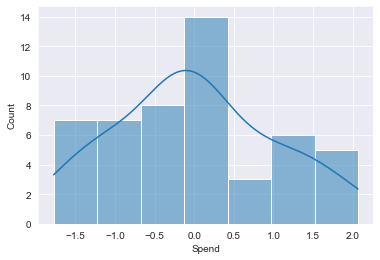

In [131]:
sns.histplot(startup_3['Spend'],kde=True)

<AxesSubplot:xlabel='Administration', ylabel='Count'>

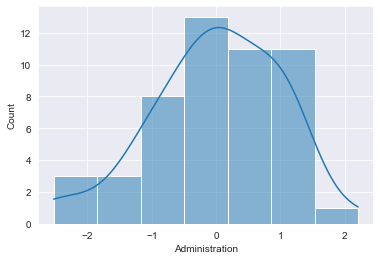

In [132]:
sns.histplot(startup_3['Administration'],kde=True)

<AxesSubplot:xlabel='MarketingSpend', ylabel='Count'>

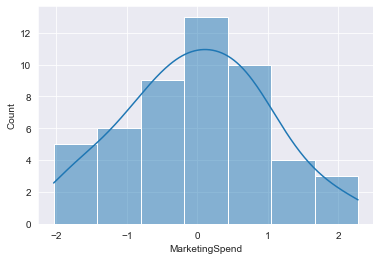

In [133]:
sns.histplot(startup_3['MarketingSpend'],kde=True)

In [136]:
model_2.pvalues

Intercept         1.000000e+00
Spend             6.702480e-10
Administration    9.079625e-01
MarketingSpend    6.071703e-02
State             3.968417e-01
dtype: float64

In [155]:
model_s=snf.ols('Profit~Spend',data=startup_3).fit()

In [156]:
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     177.6
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           9.53e-18
Time:                        22:32:55   Log-Likelihood:                -32.259
No. Observations:                  50   AIC:                             68.52
Df Residuals:                      48   BIC:                             72.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.067  -7.82e-15      1.000      -0.134       0.134
Spend          0.8873      0.067     13.326      0.000       0.753       1.021
==============================================================================
Omnibus:                       67.654   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                          -3.616   Prob(JB):                    5.58e-123
Kurtosis:                      17.763   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
model_a=snf.ols('Profit~Administration',data=startup_3).fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 16 Jun 2022   Prob (F-statistic):              0.162
Time:                        19:16:54   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.141  -3.68e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
model_m=snf.ols('Profit~MarketingSpend',data=startup_3).fit()
model_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     46.42
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.42e-08
Time:                        19:17:02   Log-Likelihood:                -54.033
No. Observations:                  50   AIC:                             112.1
Df Residuals:                      48   BIC:                             115.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.103  -5.06e-15      1.000      -0.207       0.207
MarketingSpend     0.7012      0.103      6.813      0.000       0.494       0.908
==============================================================================
Omnibus:                        8.497   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.692
Skew:                          -0.813   Prob(JB):                       0.0214
Kurtosis:                       4.025   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
model_t=snf.ols('Profit~State',data=startup_3).fit()
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Thu, 16 Jun 2022   Prob (F-statistic):              0.482
Time:                        19:17:14   Log-Likelihood:                -70.687
No. Observations:                  50   AIC:                             145.4
Df Residuals:                      48   BIC:                             149.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.144  -3.62e-15      1.000      -0.289       0.289
State          0.1018      0.144      0.709      0.482      -0.187       0.390
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
model_mod=snf.ols('Profit~Administration+State',data=startup_3).fit()
model_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.241
Date:                Thu, 16 Jun 2022   Prob (F-statistic):              0.298
Time:                        22:35:53   Log-Likelihood:                -69.660
No. Observations:                  50   AIC:                             145.3
Df Residuals:                      47   BIC:                             151.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.142  -3.66e-15      1.000      -0.286       0.286
Administration     0.1995      0.142      1.404      0.167      -0.086       0.486
State              0.0994      0.142      0.699      0.488      -0.187       0.385
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.302
Skew:                           0.132   Prob(JB):                        0.860
Kurtosis:                       2.726   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

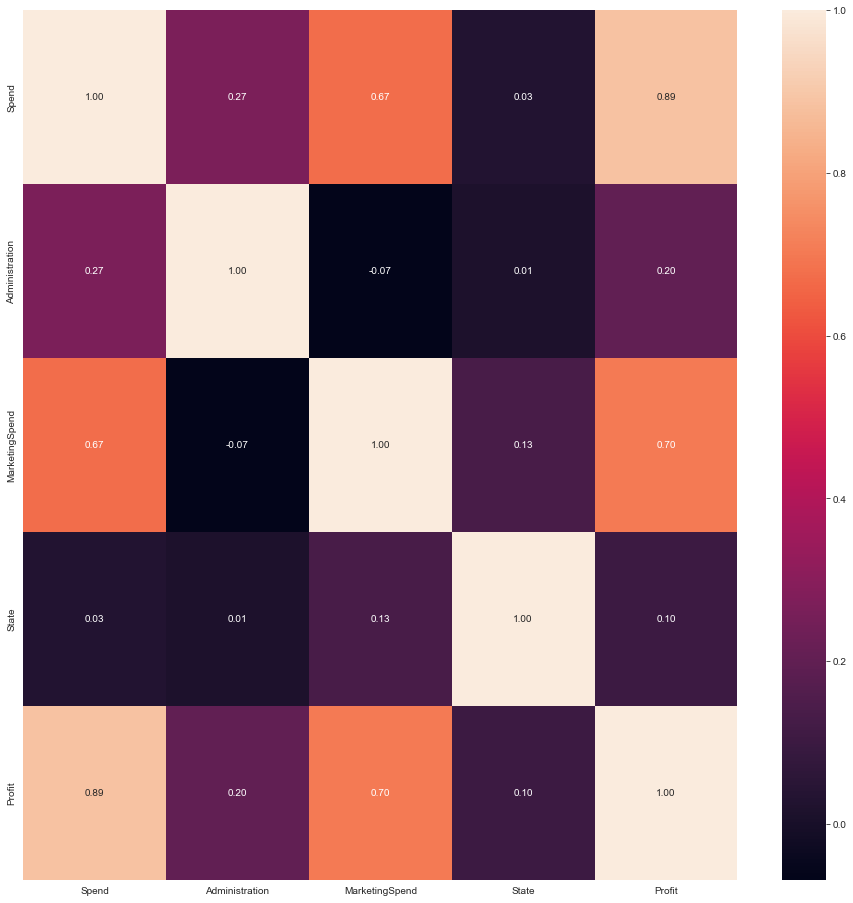

In [148]:
plt.figure(figsize=(16,16))
sns.heatmap(startup_3.corr(),annot=True,cbar=True,fmt='.2f')

In [150]:
model_2.resid

0    -0.051572
1     0.164612
2     0.315689
3     0.240258
4    -0.033259
5    -0.147618
6     0.299475
7    -0.030627
8     0.004971
9     0.053910
10    0.401167
11    0.415937
12    0.390451
13    0.302360
14   -0.317293
15   -0.355403
16    0.351570
17   -0.158707
18   -0.077851
19    0.040066
20    0.113949
21   -0.253934
22   -0.128377
23   -0.051607
24   -0.015389
25    0.304319
26    0.010146
27   -0.382490
28    0.128352
29    0.038284
30    0.182118
31    0.061196
32    0.234051
33    0.014556
34    0.232016
35    0.127619
36    0.353746
37    0.159575
38    0.242550
39    0.060630
40    0.158169
41    0.118264
42    0.128324
43    0.271883
44    0.179780
45    0.465525
46   -0.352042
47   -1.602966
48   -0.588954
49   -2.017427
dtype: float64

In [151]:
import statsmodels.api as sn

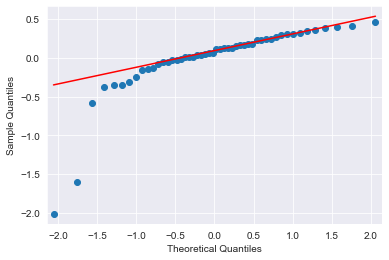

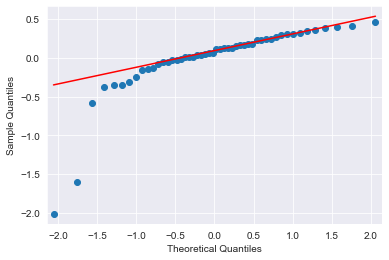

In [154]:
sn.qqplot(model_2.resid,line='q')

In [171]:
sas=startup_3[['MarketingSpend','Spend','Profit']]

In [172]:
sas

,MarketingSpend,Spend,Profit
0,2.281641,2.068016,2.011203
1,2.025190,2.003850,1.999430
2,1.694445,1.790325,1.980842
3,1.466969,1.578830,1.776627
4,1.310341,1.526008,1.357740
5,1.279928,1.287431,1.127250
6,-0.882591,1.351295,1.105481
7,0.921403,1.250614,1.096210
8,0.808622,1.023110,1.007470
9,0.747634,1.088229,0.946022


In [173]:
model_sp=snf.ols('Profit~MarketingSpend+Spend',data=sas).fit()
model_sp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     98.35
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.60e-17
Time:                        23:00:28   Log-Likelihood:                -29.802
No. Observations:                  50   AIC:                             65.60
Df Residuals:                      47   BIC:                             71.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.064  -8.12e-15      1.000      -0.129       0.129
MarketingSpend     0.1907      0.087      2.203      0.033       0.017       0.365
Spend              0.7590      0.087      8.769      0.000       0.585       0.933
==============================================================================
Omnibus:                       58.621   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.127
Skew:                          -3.129   Prob(JB):                     4.19e-76
Kurtosis:                      14.290   Cond. No.                         2.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     48.07
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.09e-15
Time:                        22:58:52   Log-Likelihood:                -29.383
No. Observations:                  50   AIC:                             68.77
Df Residuals:                      45   BIC:                             78.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.065  -8.02e-15      1.000      -0.131       0.131
Spend              0.7606      0.097      7.802      0.000       0.564       0.957
Administration     0.0084      0.072      0.116      0.908      -0.137       0.154
MarketingSpend     0.1827      0.095      1.924      0.061      -0.009       0.374
State              0.0564      0.066      0.855      0.397      -0.076       0.189
==============================================================================
Omnibus:                       54.935   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.728
Skew:                          -2.937   Prob(JB):                     1.49e-62
Kurtosis:                      13.107   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
startup_3.head(2)

,Spend,Administration,MarketingSpend,State,Profit
0,2.068016,0.560753,2.281641,1.212678,2.011203
1,2.003850,1.082807,2.025190,-1.212678,1.999430


In [177]:
x=startup_3[['MarketingSpend','Spend','Administration','State']]

In [179]:
vif_data=pd.DataFrame()

In [180]:
vif_data['features']=x.columns

In [183]:
vif_data['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,vif
0,MarketingSpend,2.139780
1,Spend,2.254960
2,Administration,1.232427
3,State,1.029725


eval_env: 1


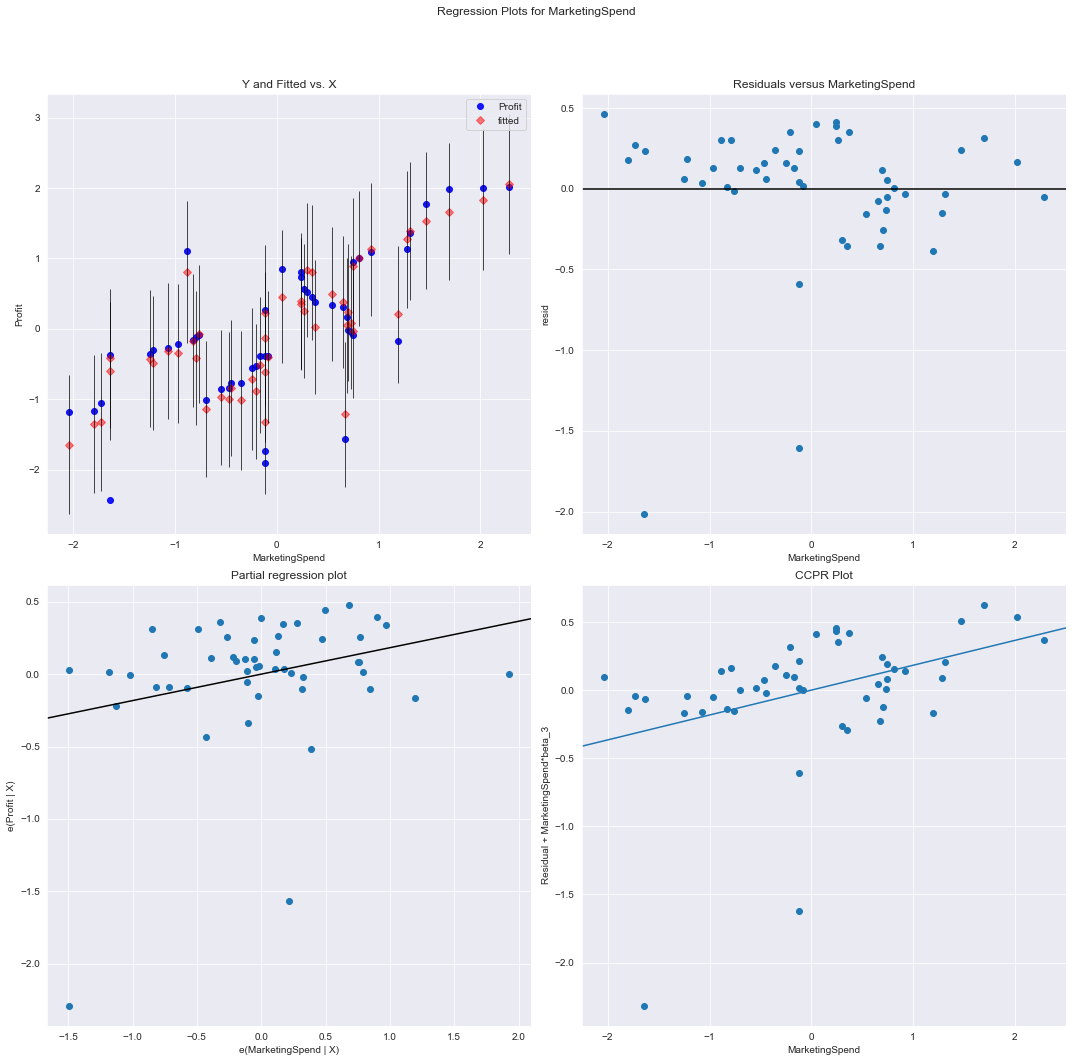

In [184]:
fig=plt.figure(figsize=(15,15))
plot_m=sn.graphics.plot_regress_exog(model_2,'MarketingSpend',fig=fig)

eval_env: 1


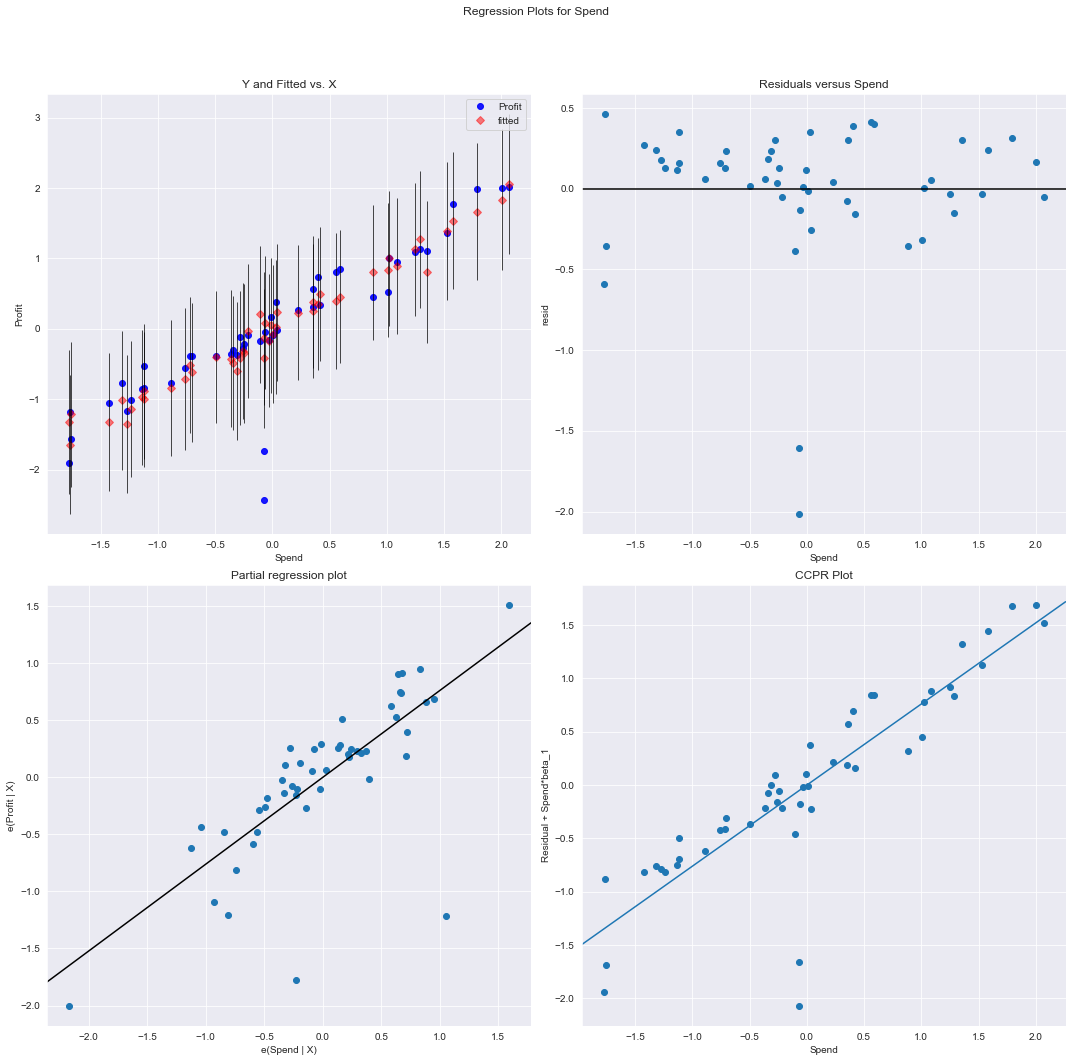

In [185]:
fig=plt.figure(figsize=(15,15))
plot_m=sn.graphics.plot_regress_exog(model_2,'Spend',fig=fig)

eval_env: 1


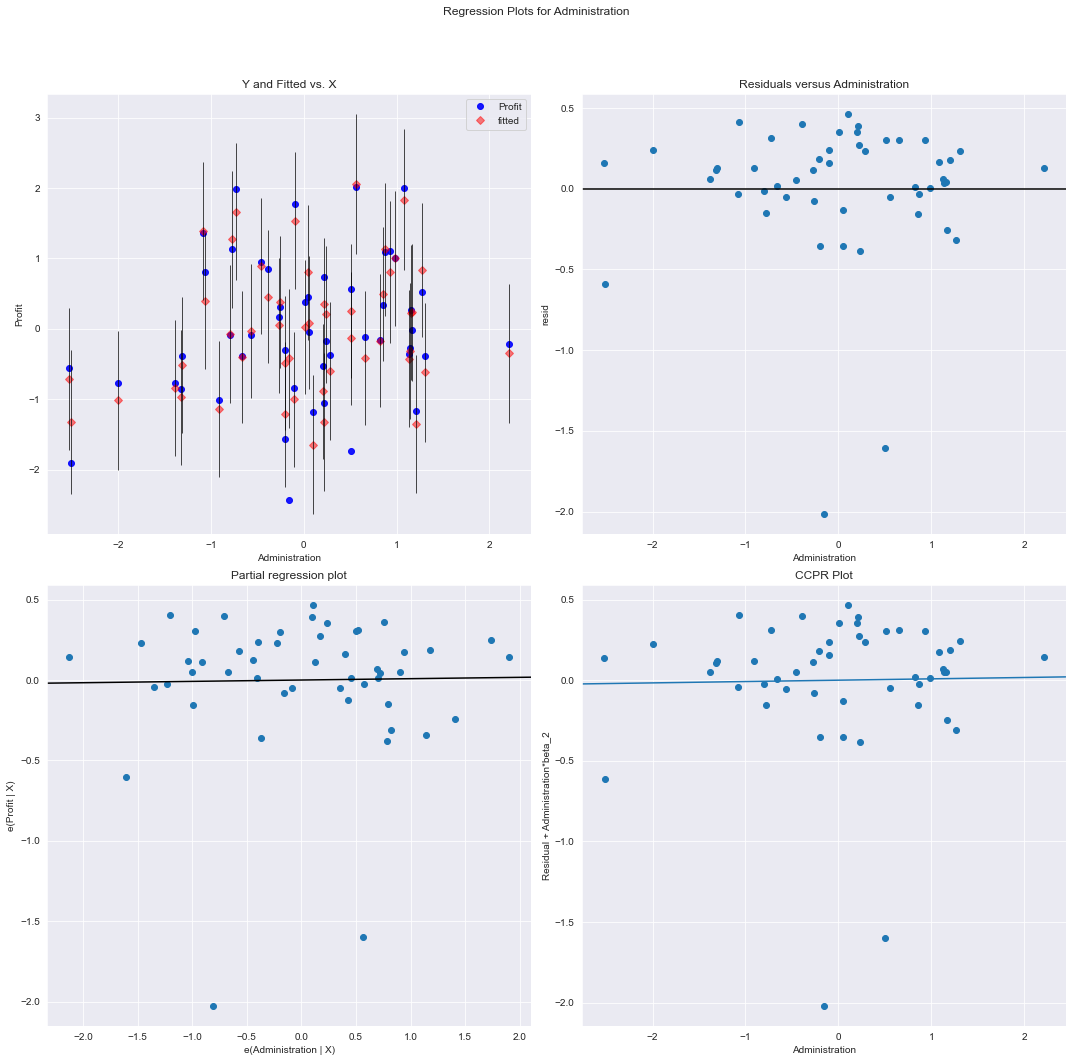

In [186]:
fig=plt.figure(figsize=(15,15))
plot_m=sn.graphics.plot_regress_exog(model_2,'Administration',fig=fig)

eval_env: 1


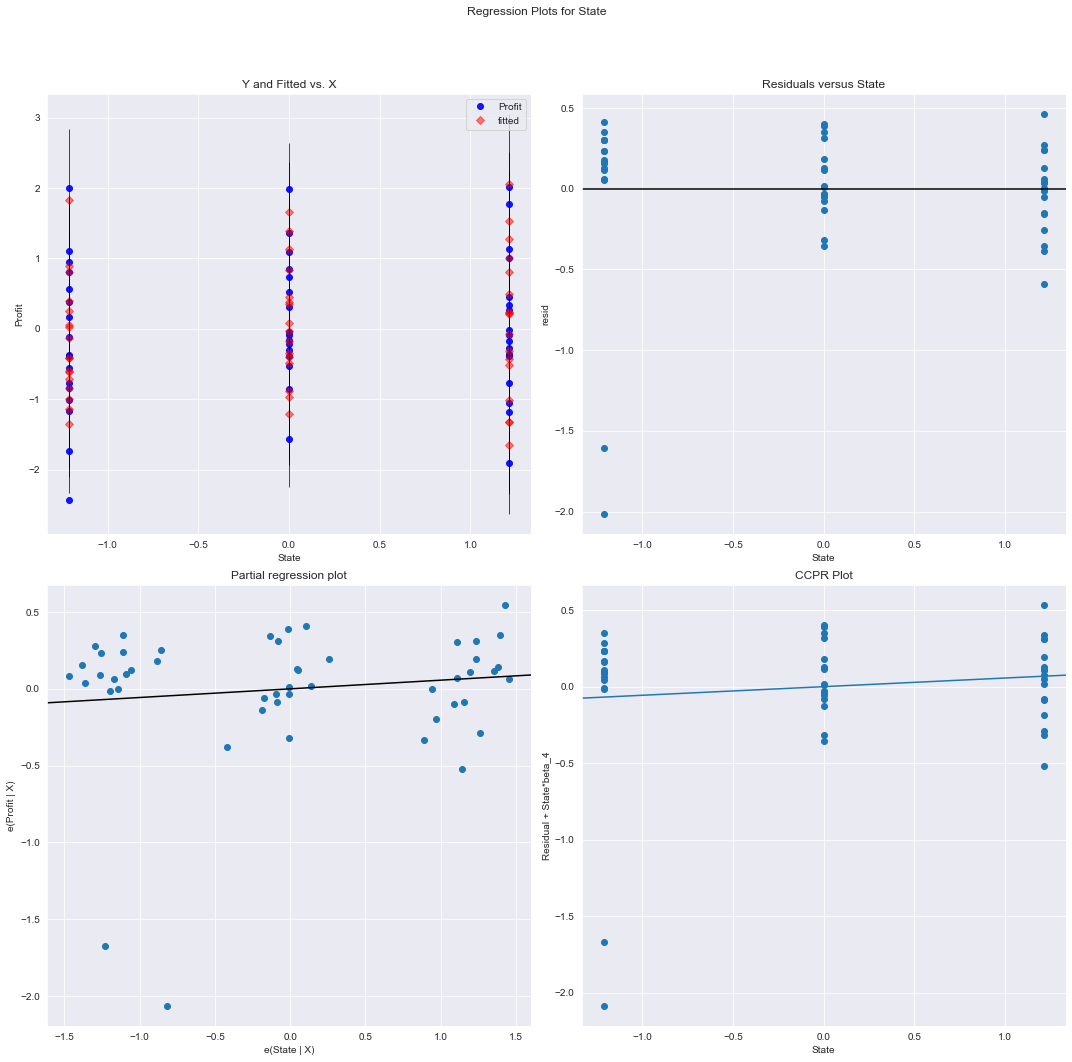

In [187]:
fig=plt.figure(figsize=(15,15))
plot_m=sn.graphics.plot_regress_exog(model_2,'State',fig=fig)

In [191]:
sas_1=snf.ols('Profit~Spend+MarketingSpend+State',data=startup_3).fit()
sas_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     65.49
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.24e-16
Time:                        23:20:54   Log-Likelihood:                -29.390
No. Observations:                  50   AIC:                             66.78
Df Residuals:                      46   BIC:                             74.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.064   -8.1e-15      1.000      -0.129       0.129
Spend              0.7655      0.087      8.789      0.000       0.590       0.941
MarketingSpend     0.1788      0.088      2.035      0.048       0.002       0.356
State              0.0568      0.065      0.874      0.387      -0.074       0.188
==============================================================================
Omnibus:                       55.179   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.579
Skew:                          -2.950   Prob(JB):                     2.17e-63
Kurtosis:                      13.184   Cond. No.                         2.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     48.07
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.09e-15
Time:                        23:19:35   Log-Likelihood:                -29.383
No. Observations:                  50   AIC:                             68.77
Df Residuals:                      45   BIC:                             78.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.065  -8.02e-15      1.000      -0.131       0.131
Spend              0.7606      0.097      7.802      0.000       0.564       0.957
Administration     0.0084      0.072      0.116      0.908      -0.137       0.154
MarketingSpend     0.1827      0.095      1.924      0.061      -0.009       0.374
State              0.0564      0.066      0.855      0.397      -0.076       0.189
==============================================================================
Omnibus:                       54.935   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.728
Skew:                          -2.937   Prob(JB):                     1.49e-62
Kurtosis:                      13.107   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# After considering very values and plots we can see Administration is not contributing in any way to predict Profit so we are droping Administration.

In [192]:
startup_3.drop(['Administration'],axis=1,inplace=True)

In [193]:
startup_3

,Spend,MarketingSpend,State,Profit
0,2.068016,2.281641,1.212678,2.011203
1,2.003850,2.025190,-1.212678,1.999430
2,1.790325,1.694445,0.000000,1.980842
3,1.578830,1.466969,1.212678,1.776627
4,1.526008,1.310341,0.000000,1.357740
5,1.287431,1.279928,1.212678,1.127250
6,1.351295,-0.882591,-1.212678,1.105481
7,1.250614,0.921403,0.000000,1.096210
8,1.023110,0.808622,1.212678,1.007470
9,1.088229,0.747634,-1.212678,0.946022


In [194]:
model_final=snf.ols('Profit~Spend+MarketingSpend+State',data=startup_3).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     65.49
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.24e-16
Time:                        23:28:05   Log-Likelihood:                -29.390
No. Observations:                  50   AIC:                             66.78
Df Residuals:                      46   BIC:                             74.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.064   -8.1e-15      1.000      -0.129       0.129
Spend              0.7655      0.087      8.789      0.000       0.590       0.941
MarketingSpend     0.1788      0.088      2.035      0.048       0.002       0.356
State              0.0568      0.065      0.874      0.387      -0.074       0.188
==============================================================================
Omnibus:                       55.179   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.579
Skew:                          -2.950   Prob(JB):                     2.17e-63
Kurtosis:                      13.184   Cond. No.                         2.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
influence=model_final.get_influence()

In [203]:
(c, _)=influence.cooks_distance

In [212]:
(np.argmax(c),np.max(c))

(49, 0.8428649686023564)

<Figure size 2160x648 with 0 Axes>

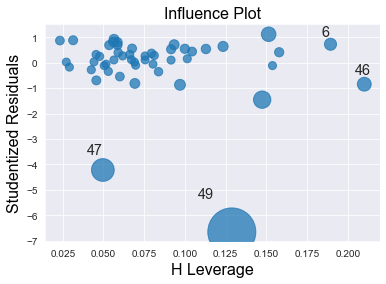

In [213]:
from statsmodels.graphics.regressionplots import influence_plot
fig=plt.figure(figsize=(30,9))
influence_plot(model_final)
plt.show()

In [214]:
startup_3.drop([49,47],inplace=True)

In [216]:
model_final=snf.ols('Profit~Spend+MarketingSpend+State',data=startup_3).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     332.4
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           3.10e-30
Time:                        23:43:31   Log-Likelihood:                 11.812
No. Observations:                  48   AIC:                            -15.62
Df Residuals:                      44   BIC:                            -8.140
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0843      0.029      2.950      0.005       0.027       0.142
Spend              0.8475      0.039     21.931      0.000       0.770       0.925
MarketingSpend     0.0517      0.040      1.295      0.202      -0.029       0.132
State             -0.0307      0.029     -1.058      0.296      -0.089       0.028
==============================================================================
Omnibus:                        0.136   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.003
Skew:                          -0.009   Prob(JB):                        0.998
Kurtosis:                       2.963   Cond. No.                         2.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""